In [1]:
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

In [137]:
#Create training and test datas
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [138]:
#get 5 rows from training data
training.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#shape of training
print(training.shape)

(42000, 785)


In [140]:
#deleting some a lot information form trainig data
X_train = training.drop("label", axis=1)
y_train = training["label"]

In [141]:
#xTrain = X_train.to_numpy()
#yTrain = y_train.to_numpy()

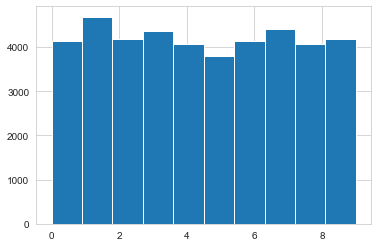

In [142]:
#create hist diagram
ax = plt.hist(y_train)

In [143]:
#brings 50 pictures as we want
#plt.figure(figsize=(14, 10))
#def show_images(numbers):
#    for i in range(1, numbers + 1):
#        plt.subplot(5, 10, i)
#        image = X_train.iloc[i].as_matrix()
#        image = image.reshape((28,28))
#        plt.imshow(image, cmap='gray')
#        plt.xticks([]), plt.yticks([])
#        plt.title(y_train[i])
#
#show_images(50)

In [144]:
#max training data
max(training["pixel99"])

255

In [145]:
#
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def rescale_table(table):
    table = table.astype("float32")
    for i in table:
        reshaped_array = np.array(table[i]).reshape(-1, 1)
        table[i] = scaler.fit_transform(reshaped_array)
    return table

X_train = rescale_table(X_train)

X_test = testing
X_test = rescale_table(X_test)

#delete old sets to free space
del training
del testing

In [146]:
#random 10 sample from training data
X_train.sample(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
max(X_train["pixel99"])

1.0

In [148]:
#different value in ytrain
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [149]:
#one hot coding for easily classification
def one_hot_encode(y_train):
    return pd.get_dummies(y_train)

y_train = one_hot_encode(y_train)

In [150]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [151]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [152]:
#define our prediction function.
learning_rate = 0.3
epochs = 100

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
bias = tf.Variable(tf.zeros([10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_prediction = tf.nn.softmax(tf.matmul(x, W) + bias)

In [153]:
#loss function is cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_prediction, labels=y_true))

In [154]:
#evaluate our model's performance for classifying the numbers
correct_predictions = tf.equal(tf.argmax(y_prediction,1), tf.argmax(y_true,1))
accuracy_measure = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [155]:
#gradients optimizer we will use
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [156]:
sess = tf.InteractiveSession()

init = tf.global_variables_initializer()
sess.run(init)

In [157]:
#training our data
for i in range(epochs + 1):
    sess.run(training_step, feed_dict={x: X_train, y_true: y_train})
    print("Epoch " + str(i) + " accuracy: " + str(sess.run(accuracy_measure, feed_dict={x: X_valid, y_true: y_valid})))

Epoch 0 accuracy: 0.6725
Epoch 1 accuracy: 0.6673809
Epoch 2 accuracy: 0.6582143
Epoch 3 accuracy: 0.64666665
Epoch 4 accuracy: 0.6294048
Epoch 5 accuracy: 0.60511905
Epoch 6 accuracy: 0.57869047
Epoch 7 accuracy: 0.54821426
Epoch 8 accuracy: 0.51464283
Epoch 9 accuracy: 0.48416665
Epoch 10 accuracy: 0.46345237
Epoch 11 accuracy: 0.45964286
Epoch 12 accuracy: 0.46821427
Epoch 13 accuracy: 0.48654762
Epoch 14 accuracy: 0.50964284
Epoch 15 accuracy: 0.52738094
Epoch 16 accuracy: 0.5435714
Epoch 17 accuracy: 0.554881
Epoch 18 accuracy: 0.56083333
Epoch 19 accuracy: 0.5669048
Epoch 20 accuracy: 0.5694048
Epoch 21 accuracy: 0.57059526
Epoch 22 accuracy: 0.5704762
Epoch 23 accuracy: 0.5715476
Epoch 24 accuracy: 0.5729762
Epoch 25 accuracy: 0.57357144
Epoch 26 accuracy: 0.5752381
Epoch 27 accuracy: 0.57607144
Epoch 28 accuracy: 0.5795238
Epoch 29 accuracy: 0.5827381
Epoch 30 accuracy: 0.5858333
Epoch 31 accuracy: 0.5902381
Epoch 32 accuracy: 0.5941667
Epoch 33 accuracy: 0.5997619
Epoch 34 acc

In [158]:
#last epoch values on training
sess.run(accuracy_measure, feed_dict={x: X_valid, y_true: y_valid})

0.78880954